# **(ADD HERE THE NOTEBOOK NAME)**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/os-medals/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/os-medals'

# Section 1

Section 1 content

In [4]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


---

# Section 2

Section 2 content

In [5]:
import pandas as pd

In [6]:
teams = pd.read_csv("teams.csv")

In [7]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [8]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [9]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [10]:
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [12]:
import seaborn as sns

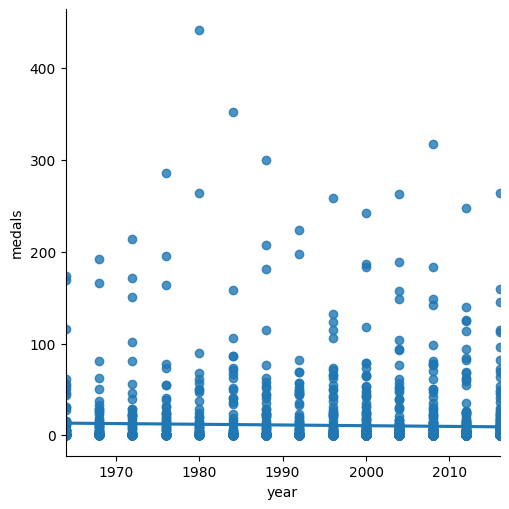

In [63]:
sns.lmplot(x="year", y="medals", data=teams, fit_reg=True, ci=None)

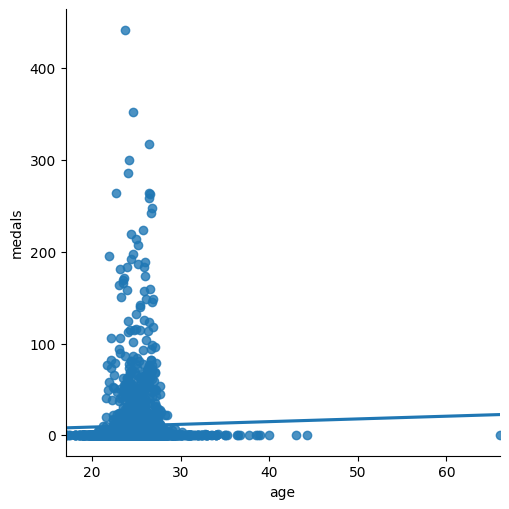

In [14]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

<AxesSubplot:ylabel='Frequency'>

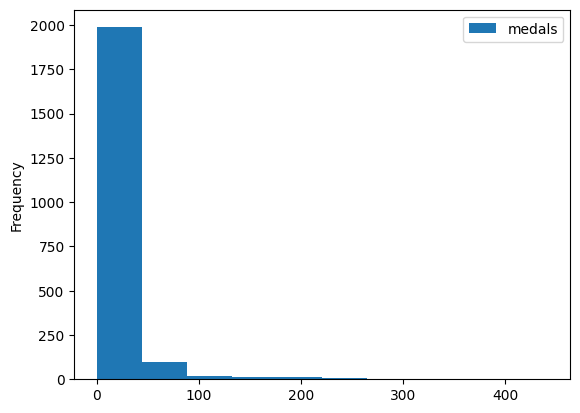

In [15]:
teams.plot.hist(y="medals")

In [16]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [17]:
teams = teams.dropna()

In [18]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [19]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >=2012].copy()

In [20]:
train.shape

(1609, 7)

In [21]:
test.shape

(405, 7)

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [35]:
predictors = ["year", "age"]
target = "medals"

In [36]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [37]:
predictions = reg.predict(test[predictors])

In [38]:
test["predictions"] = predictions

In [39]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,9.434060
7,AFG,Afghanistan,2016,3,24.7,1.0,0,9.090718
24,ALB,Albania,2012,10,25.7,0.0,0,9.411887
25,ALB,Albania,2016,6,23.7,0.0,0,9.115355
37,ALG,Algeria,2012,39,24.8,2.0,1,9.434060
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,9.223759
2131,ZAM,Zambia,2012,7,22.6,0.0,0,9.488262
2132,ZAM,Zambia,2016,7,24.1,0.0,0,9.105500
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,9.372467


In [40]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [41]:
test["predictions"] = test["predictions"].round()

In [42]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,9.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,9.0
24,ALB,Albania,2012,10,25.7,0.0,0,9.0
25,ALB,Albania,2016,6,23.7,0.0,0,9.0
37,ALG,Algeria,2012,39,24.8,2.0,1,9.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,9.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,9.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,9.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,9.0


In [43]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])

In [44]:
error

14.0

In [45]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [46]:
test[test["team"] == "SWE"]

,team,country,year,athletes,age,prev_medals,medals,predictions
1851,SWE,Sweden,2012,168,28.4,7.0,22,9.0
1852,SWE,Sweden,2016,186,27.7,22.0,28,9.0


In [48]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,9.0
908,IND,India,2016,130,26.1,6.0,2,9.0


In [49]:
errors = (test["medals"] - test["predictions"]).abs()

In [50]:
errors

6       8.0
7       9.0
24      9.0
25      9.0
37      8.0
       ... 
2111    9.0
2131    9.0
2132    9.0
2142    9.0
2143    9.0
Length: 405, dtype: float64

In [51]:
error_by_team = errors.groupby(test["team"]).mean()

In [52]:
error_by_team

team
AFG    8.5
ALB    9.0
ALG    7.5
AND    9.0
ANG    9.0
      ... 
VIE    8.0
VIN    9.5
YEM    9.5
ZAM    9.0
ZIM    9.0
Length: 204, dtype: float64

In [53]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [54]:
error_ratio = error_by_team / medals_by_team

In [55]:
error_ratio

team
AFG    17.0
ALB     inf
ALG     5.0
AND     inf
ANG     inf
       ... 
VIE     8.0
VIN     inf
YEM     inf
ZAM     inf
ZIM     inf
Length: 204, dtype: float64

In [56]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    17.0
ALB     inf
ALG     5.0
AND     inf
ANG     inf
       ... 
VIE     8.0
VIN     inf
YEM     inf
ZAM     inf
ZIM     inf
Length: 204, dtype: float64

In [57]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [58]:
error_ratio

team
AFG    17.000000
ALG     5.000000
ARG     0.560976
ARM     1.571429
AUS     0.908163
         ...    
UKR     0.560976
USA     0.964844
UZB     0.625000
VEN     3.500000
VIE     8.000000
Length: 97, dtype: float64

<AxesSubplot:ylabel='Frequency'>

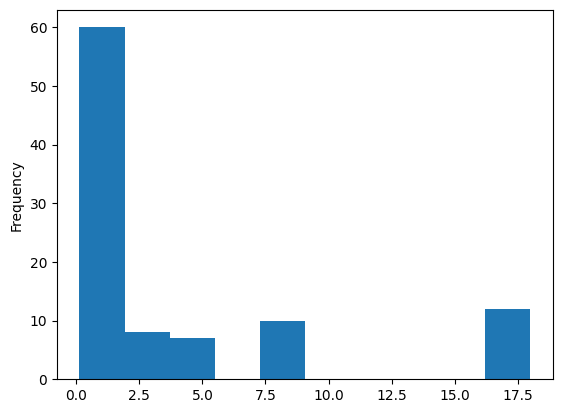

In [59]:
error_ratio.plot.hist()

In [60]:
error_ratio.sort_values()

team
COL     0.125
ETH     0.200
IRI     0.200
KEN     0.250
CUB     0.280
        ...  
JOR    17.000
CYP    17.000
AFG    17.000
GAB    18.000
BDI    18.000
Length: 97, dtype: float64

In [61]:
import joblib
joblib.dump(reg, 'trained_model.joblib')

['trained_model.joblib']

In [ ]:
import joblib 
joblib.dump(re)

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
